100%|██████████| 262k/262k [00:00<00:00, 55.7MB/s]

Extracting files...
Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



=== Decision Tree Performance ===
Accuracy: 0.854
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.80      0.37      0.51       407

    accuracy                           0.85      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.85      0.85      0.83      2000


=== Random Forest Performance ===
Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.81      0.42      0.56       407

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



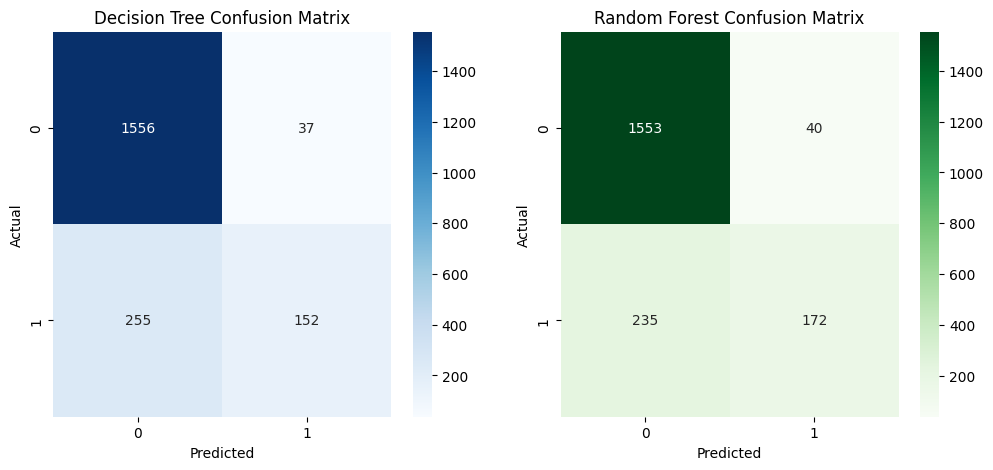

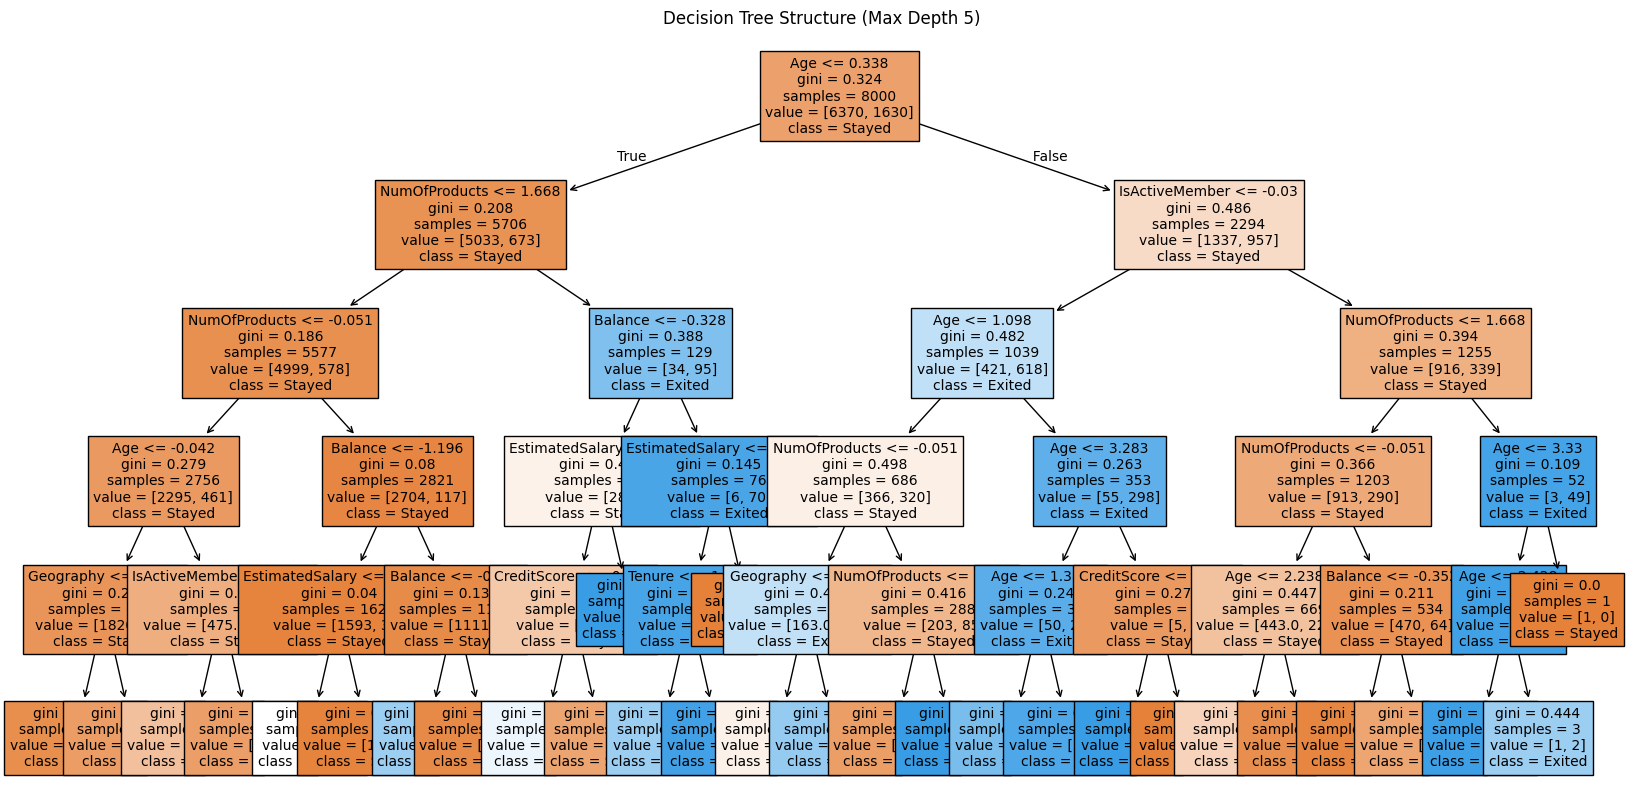

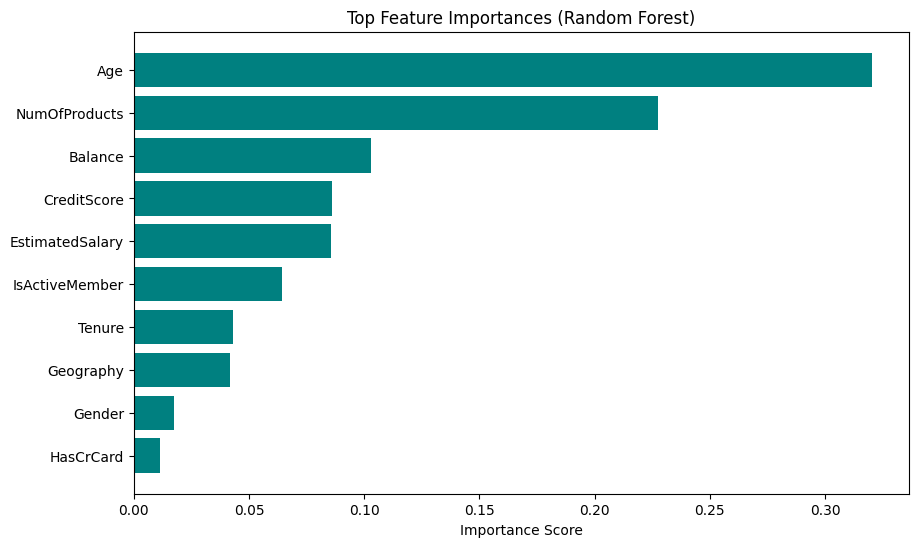

In [ ]:
# Install dependency
!pip install kagglehub -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# 1. Load Data
# -------------------------
# Download the dataset
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

# Find the CSV file inside the downloaded folder
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

print("Dataset Shape:", df.shape)
display(df.head())

# -------------------------
# 2. Preprocessing
# -------------------------
# Drop columns that are just identifiers (not useful for prediction)
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Encode Categorical Variables (Gender, Geography) into numbers
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])

# Define X (Features) and y (Target)
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scaling (Optional for Trees, but good practice if swapping models later)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 3. Train Models
# -------------------------
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10, # Increased depth slightly for Forest
    random_state=42
)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# -------------------------
# 4. Evaluation
# -------------------------
print("\n=== Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

print("\n=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# -------------------------
# 5. Visualizations
# -------------------------

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, dt_preds),
            annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, rf_preds),
            annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Decision Tree Structure Plot
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Stayed", "Exited"],
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Structure (Max Depth 5)")
plt.show()


# Feature Importance Plot (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:] # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices], color='teal')
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()